In [1]:
#same shit from loops regression
from sklearn.datasets import fetch_california_housing

cali = fetch_california_housing()

X = cali.data
y = cali.target

print(X.shape)
print(y.shape)

import pandas as pd
df = pd.DataFrame(X)
df.columns = cali.feature_names
df.head()

#normalise

import numpy as np
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
print(u.shape, std.shape)

X = (X-u)/std
df = pd.DataFrame(X)
df.columns = cali.feature_names
df.head()

ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)
df = pd.DataFrame(X)
df.head()

(20640, 8)
(20640,)
(8,) (8,)
(20640, 9)


,0,1,2,3,4,5,6,7,8
0,1.0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,1.0,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.0,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,1.0,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,1.0,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [2]:
#vectorised stuff instead of running loops and storing values in list
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    y_hat = hypothesis(X,theta)
    e = np.sum((y-y_hat)**2)
    
    return e/m

def gradient(X,y,theta):
    y_hat = hypothesis(X,theta)
    grad = np.dot(X.T,(y_hat-y))
    m = X.shape[0]
    
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [3]:
theta, error_list = gradient_descent(X,y)

In [4]:
theta

array([ 2.06855817e+00,  8.43400811e-01,  1.33081686e-01, -2.69595327e-01,
        2.99398803e-01,  5.31172189e-04, -4.08323317e-02, -7.82482676e-01,
       -7.53679217e-01])

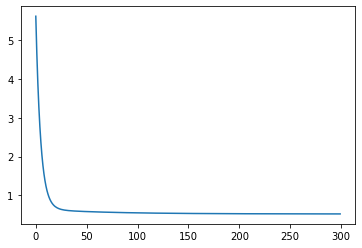

In [5]:
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()

In [6]:
y_hat = hypothesis(X,theta)
y_hat

array([4.14001775, 3.97273641, 3.68541927, ..., 0.25306538, 0.39539212,
       0.59801544])

In [8]:
def r2_score(y,y_hat):
    num = np.sum((y-y_hat)**2)
    denom = np.sum((y-y.mean())**2)
    score = (1-num/denom)
    return score*100

In [9]:
r2_score(y,y_hat)

60.49796286837967

In [ ]:
#same value and results because its the same linear regression model (weight and bias is initialised by 0 in both cases, if we want to change the output we have to change the learnable parameters that is weight and bias).
#Vectorisation just works faster as instead of doing loop by loop calculations it does dot product and shit which is way faster